## **Flight Dataset**

In [55]:
import pandas as pd
import numpy as np

In [56]:
df_train = pd.read_excel('/content/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [57]:
df_train.shape

(10683, 11)

In [58]:
df_test = pd.read_excel('/content/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [59]:
df_test.shape

(2671, 10)

In [60]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [61]:
df.shape

(13354, 11)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [63]:
#Feature Engineering
df['Date'] = df.Date_of_Journey.str.split("/").str[0].astype(int)
df['Month'] = df.Date_of_Journey.str.split("/").str[1].astype(int)
df['Year'] = df.Date_of_Journey.str.split("/").str[2].astype(int)

In [64]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [66]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [67]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [68]:
df.Arrival_Time=df.Arrival_Time.str.split(' ').str[0]

In [69]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


## **We can also able to create a fucntion that will split and drop that unecessay column**

In [70]:
arr_val = df.Arrival_Time.str.split(':')
df['Arrival_hr'] = arr_val.str[0].astype(int)
df['Arrival_min'] = arr_val.str[1].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hr       13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.5+ MB


In [72]:
dep_val = df.Dep_Time.str.split(':')
df['Depature_hr'] = dep_val.str[0].astype(int)
df['Depature_min'] = dep_val.str[1].astype(int)

In [73]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [74]:
df.drop('Arrival_Time', axis=1, inplace=True)
df.drop('Dep_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


We will Do the encoding.

In [75]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
df[df.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


There is only one value so we can replace with the best match so it doesn't effect the things.

In [77]:
df[(df.Source == 'Delhi') & (df.Destination == 'Cochin') & (df.Duration == '23h 40m') & (df.Airline == 'Air India') & (df.Price == 7480.0)]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min
1616,Air India,Delhi,Cochin,DEL → MAA → COK,23h 40m,1 stop,No info,7480.0,24,5,2019,9,25,9,45
2554,Air India,Delhi,Cochin,DEL → MAA → COK,23h 40m,1 stop,No info,7480.0,15,5,2019,9,25,9,45
4351,Air India,Delhi,Cochin,DEL → MAA → COK,23h 40m,1 stop,No info,7480.0,27,6,2019,9,25,9,45
7896,Air India,Delhi,Cochin,DEL → MAA → COK,23h 40m,1 stop,No info,7480.0,12,6,2019,9,25,9,45
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [78]:
df.Total_Stops[9039] = '1 stop'

<ipython-input-78-66ae0dbe8248>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Total_Stops[9039] = '1 stop'
<ipython-input-78-66ae0dbe8248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [79]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [80]:
df.Total_Stops = df.Total_Stops.map({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})
df.Total_Stops.head(5)

,Total_Stops
0,0
1,2
2,2
3,1
4,1


In [81]:
df.drop('Route', axis=1,inplace=True)

In [82]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [83]:
dur_val = df.Duration.str.split(' ')
df['Duration_hr'] = dur_val.str[0].str.split('h').str[0].astype(int)
df['Duration_hr'] = dur_val.str[1].str.split('m').str[0].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [84]:
df.shape

(13354, 14)

In [85]:
df = df[df.Duration != '5m']

In [86]:
df.shape

(13352, 14)

There are two values with the duration of 5m which is improper so we will remove that data. we can see that by the shape of df befor and after

**(13354, 14)** ----> **(13352, 14)**

In [87]:
dur_val = df.Duration.str.split(' ')
df['Duration_hr'] = dur_val.str[0].str.split('h').str[0].astype(int)
# df['Duration_hr'] = dur_val.str[1].str.split('m').str[0].astype(int)

Krish naik didn't convert for the duration min in the video only considering the hours and droping the duration column from the data.

In [88]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [89]:
df.drop('Duration', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min,Duration_hr
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Airline', ylabel='Price'>

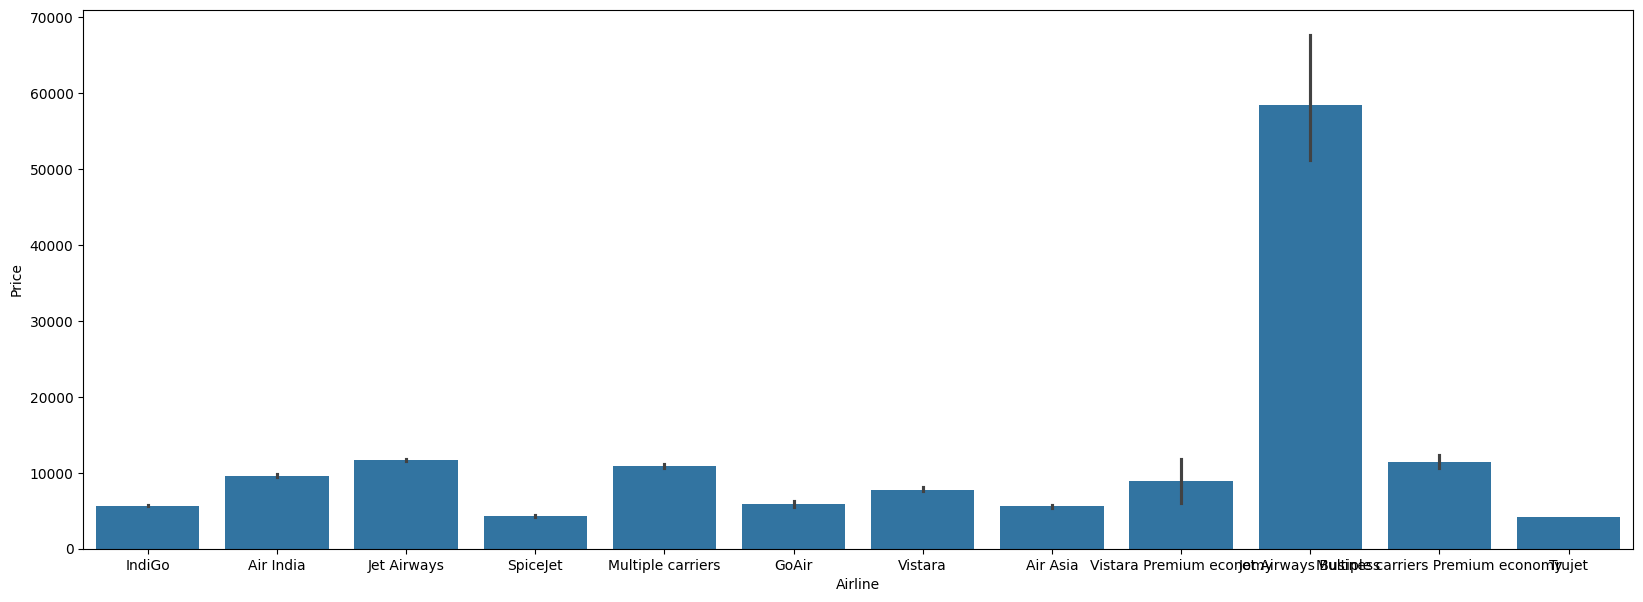

In [91]:
plt.figure(figsize=(20,7))
sns.barplot(x='Airline', y='Price', data=df)

In [92]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [93]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [94]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [95]:
df.Airline.value_counts()

,count
Airline,
Jet Airways,4746
IndiGo,2564
Air India,2190
Multiple carriers,1543
SpiceJet,1026
Vistara,608
Air Asia,405
GoAir,240
Multiple carriers Premium economy,16


In [96]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min,Duration_hr
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Airline = le.fit_transform(df['Airline'])
df.Source = le.fit_transform(df['Source'])
df.Destination = le.fit_transform(df['Destination'])
df.Additional_Info = le.fit_transform(df['Additional_Info'])

In [98]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hr,Arrival_min,Depature_hr,Depature_min,Duration_hr
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  int64  
 1   Source           13352 non-null  int64  
 2   Destination      13352 non-null  int64  
 3   Total_Stops      13352 non-null  int64  
 4   Additional_Info  13352 non-null  int64  
 5   Price            10682 non-null  float64
 6   Date             13352 non-null  int64  
 7   Month            13352 non-null  int64  
 8   Year             13352 non-null  int64  
 9   Arrival_hr       13352 non-null  int64  
 10  Arrival_min      13352 non-null  int64  
 11  Depature_hr      13352 non-null  int64  
 12  Depature_min     13352 non-null  int64  
 13  Duration_hr      13352 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.5 MB


In [101]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

df.Airline = ohe.fit_transform(df['Airline'])
df.Source = ohe.fit_transform(df['Source'])
df.Destination = ohe.fit_transform(df['Destination'])
df.Additional_Info = ohe.fit_transform(df['Additional_Info'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [102]:
df1 = pd.get_dummies(df['Airline'], drop_first=True, dtype=int)
df2 = pd.get_dummies(df['Source'], drop_first=True, dtype=int)
df3 = pd.get_dummies(df['Destination'], drop_first=True, dtype=int)
df4 = pd.get_dummies(df['Additional_Info'], drop_first=True, dtype=int)

In [109]:
final_df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True, dtype=int)

In [111]:
final_df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hr',
       'Arrival_min', 'Depature_hr', 'Depature_min', 'Duration_hr',
       'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4', 'Airline_5',
       'Airline_6', 'Airline_7', 'Airline_8', 'Airline_9', 'Airline_10',
       'Airline_11', 'Source_1', 'Source_2', 'Source_3', 'Source_4',
       'Destination_1', 'Destination_2', 'Destination_3', 'Destination_4',
       'Destination_5', 'Additional_Info_1', 'Additional_Info_2',
       'Additional_Info_3', 'Additional_Info_4', 'Additional_Info_5',
       'Additional_Info_6', 'Additional_Info_7', 'Additional_Info_8',
       'Additional_Info_9'],
      dtype='object')